In [2]:
import sys, getopt, os
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
import mpbn
import itertools
import math
import numpy
import networkx as nx
import pickle
#import ginsim
import re
import subprocess
import numpy as np
from matplotlib import pyplot as plt
from math import isnan
import clingo as asp
import mpbn

In [3]:
import pickle

In [4]:
from copy import deepcopy 

In [5]:
sys.path.append('../../../py_src/')

import funForBonesis

In [6]:
influenceGraph = "../influenceGraph/infGraphTable45.tsv"
#obsData= "obsDataFinal.csv"
obsData= "../obsDataDis.csv"
geneOrder = ["Egr1","Junb","Bclaf1","Myc","Fli1","Gata2","Spi1","Cebpa","Gata1","Klf1","Tal1","Ikzf1","Zfpm1","CDK46CycD","CIPKIP"]


In [7]:
influenceGraphTable = pd.read_table(influenceGraph)
influenceGraphTable = influenceGraphTable.drop_duplicates(subset=['tf', 'target', 'mor'])
influenceGraphTable

,tf,mor,target,ref,interaction_proof_level,cell_line,cell_type_tissue,Trusted,Scenic,cistromeAdjScore,interaction0
0,Bclaf1,1,CDK46CycD,NaN,NaN,NaN,NaN,0,True,NaN,Bclaf1_CDK46CycD
1,Bclaf1,1,Bclaf1,NaN,NaN,NaN,NaN,0,True,NaN,Bclaf1_Bclaf1
2,Bclaf1,1,Myc,NaN,NaN,NaN,NaN,0,True,NaN,Bclaf1_Myc
3,Bclaf1,1,Cebpa,NaN,NaN,NaN,NaN,0,True,NaN,Bclaf1_Cebpa
4,Cebpa,1,Gata2,NaN,NaN,NaN,NaN,0,True,0.277000,Cebpa_Gata2
5,Cebpa,1,Myc,NaN,NaN,NaN,NaN,0,True,2.982833,Cebpa_Myc
6,Egr1,1,Junb,NaN,NaN,NaN,NaN,0,True,0.007750,Egr1_Junb
7,Egr1,1,Egr1,NaN,NaN,NaN,NaN,0,True,0.121500,Egr1_Egr1
8,Egr1,1,Gata2,NaN,NaN,NaN,NaN,0,True,0.000000,Egr1_Gata2
9,Egr1,1,CIPKIP,NaN,NaN,NaN,NaN,0,True,0.000000,Egr1_CIPKIP


In [8]:
influenceGraphTableTrusted = influenceGraphTable[influenceGraphTable["Trusted"]==1].copy()

In [9]:
influenceGraphTable[influenceGraphTable["target"]=="Gata2"]

,tf,mor,target,ref,interaction_proof_level,cell_line,cell_type_tissue,Trusted,Scenic,cistromeAdjScore,interaction0
4,Cebpa,1,Gata2,NaN,NaN,NaN,NaN,0,True,0.277000,Cebpa_Gata2
8,Egr1,1,Gata2,NaN,NaN,NaN,NaN,0,True,0.000000,Egr1_Gata2
20,Gata2,1,Gata2,Grass_2003;Krumsiek_2011,transcriptionnal regulation,NaN,HSC,1,True,0.275000,Gata2_Gata2
22,Junb,1,Gata2,NaN,NaN,NaN,NaN,0,True,0.007417,Junb_Gata2
48,Spi1,-1,Gata2,Walsh_2002;Krumsiek_2011,"KO, possible transcriptionnal regulation",NaN,MPP,1,False,0.002105,Spi1_Gata2
49,Gata1,-1,Gata2,Grass_2003;Onheda_2002;Krumsiek_2011,transcriptionnal regulation,NaN,MEP,1,False,0.353067,Gata1_Gata2
50,Zfpm1,-1,Gata2,Onheda_2002;Tsang_1998;Krumsiek_2011,KO (Gata1 cofactor),NaN,HSC,1,False,0.139000,Zfpm1_Gata2


In [10]:
influenceGraphTable[influenceGraphTable["target"]=="Gata1"]

,tf,mor,target,ref,interaction_proof_level,cell_line,cell_type_tissue,Trusted,Scenic,cistromeAdjScore,interaction0
13,Gata1,1,Gata1,Tsai_1991;Krumsiek_2011,transcriptionnal_regulation,MEL,NaN,1,True,2.538600,Gata1_Gata1
29,Klf1,1,Gata1,NaN,NaN,NaN,NaN,0,True,NaN,Klf1_Gata1
44,Ikzf1,-1,Gata1,Malinge_2013,"KO, functionnal interaction",NaN,NaN,1,False,NaN,Ikzf1_Gata1
45,Spi1,-1,Gata1,Zhang_2000;Krumsiek_2011,physical interaction,"K562,G1ER",NaN,1,False,0.457333,Spi1_Gata1
46,Gata2,1,Gata1,Onheda_2002;Krumsiek_2011,transcriptionnal_regulation,NaN,"HSC,MPP",1,False,0.414900,Gata2_Gata1
47,Fli1,1,Gata1,Stark_2003;Krumsiek_2011,Physical interaction,MEL,NaN,1,False,0.000000,Fli1_Gata1


In [11]:
influenceGraphTable[influenceGraphTable["target"]=="Cebpa"]

,tf,mor,target,ref,interaction_proof_level,cell_line,cell_type_tissue,Trusted,Scenic,cistromeAdjScore,interaction0
3,Bclaf1,1,Cebpa,NaN,NaN,NaN,NaN,0,True,NaN,Bclaf1_Cebpa
17,Gata2,1,Cebpa,Cooper_2015,transcriptionnal regulation (+37 kb enhancer b...,NaN,32Dcl3,0,True,0.0102,Gata2_Cebpa
35,Myc,1,Cebpa,NaN,NaN,NaN,NaN,0,True,1.7226,Myc_Cebpa
36,Spi1,1,Cebpa,Cooper_2015,transcriptionnal regulation (+37 kb enhancer b...,NaN,32Dcl3,0,True,0.0000,Spi1_Cebpa
38,Ikzf1,-1,Cebpa,Rao_2013,transcriptionnal regulation,NaN,Bone marrow under mast cell differentiation pr...,1,False,NaN,Ikzf1_Cebpa
39,Gata1,-1,Cebpa,Laiosa_2006;Krumsiek_2011,downregulation (weak evidence),NaN,NaN,0,False,0.0000,Gata1_Cebpa
40,Tal1,-1,Cebpa,Laiosa_2006;Krumsiek_2011,downregulation (weak evidence),NaN,NaN,0,False,0.0000,Tal1_Cebpa
41,Zfpm1,-1,Cebpa,Chickarmane_2009;Laiosa_2006;Krumsiek_2011,Mathematical modelling prediction;downregulati...,NaN,NaN,0,False,0.0280,Zfpm1_Cebpa
42,Cebpa,1,Cebpa,Cooper_2015;Timchenko_1995;Christy_1991;Krumsi...,transcriptionnal regulation (+37 kb enhancer b...,Hep3B2;3T3-L1,NaN,0,False,4.9450,Cebpa_Cebpa


In [12]:
influenceGraphTable[influenceGraphTable["target"]=="Fli1"]

,tf,mor,target,ref,interaction_proof_level,cell_line,cell_type_tissue,Trusted,Scenic,cistromeAdjScore,interaction0
10,Fli1,1,Fli1,NaN,NaN,NaN,NaN,0,True,0.143500,Fli1_Fli1
16,Gata2,1,Fli1,NaN,NaN,NaN,NaN,0,True,0.660500,Gata2_Fli1
26,Junb,1,Fli1,NaN,NaN,NaN,NaN,0,True,0.049917,Junb_Fli1
30,Klf1,-1,Fli1,Starck_2003;Krumsiek_2011,physical interaction,MEL,NaN,1,True,NaN,Klf1_Fli1
43,Gata1,1,Fli1,Barbeau_1999;Krumsiek_2011,transcriptionnal regulation,HEL,NaN,1,False,2.321600,Gata1_Fli1


# computing graph layout...


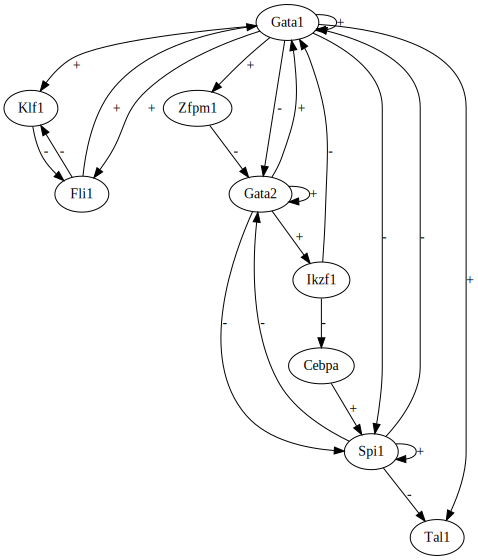

In [13]:
# Creating influence graph Trusted
infTrusted = []
for r in influenceGraphTableTrusted.index:
    infTrusted.append((influenceGraphTableTrusted["tf"][r],influenceGraphTableTrusted["target"][r],dict(sign= influenceGraphTableTrusted["mor"][r])))

domTrusted = bonesis.InfluenceGraph(infTrusted, maxclause = 3,exact=False)
domTrusted

In [14]:
len(infTrusted)

22

In [15]:
# Creating influence graph 
inf0 = []
for r in influenceGraphTable.index:
    inf0.append((influenceGraphTable["tf"][r],influenceGraphTable["target"][r],dict(sign= influenceGraphTable["mor"][r])))



In [16]:
dataTable = pd.read_csv(obsData,index_col = 0)
## Adjustement
dataTable["Myc"].loc["pNeuMast"] =  float('NaN')
dataTable["Myc"].loc["pEr"] =  float('NaN')
dataTable["Myc"].loc["pMk"] =  float('NaN')
dataTable["CDK46CycD"].loc["pMk"] =  float('NaN')
dataTable["Bclaf1"].loc["pLymph"] =  float('NaN')
dataTable["CIPKIP"].loc["pLymph"] =  float('NaN')

dataTable["Egr1"].loc["srHSC"] =  float('NaN')
dataTable["Gata2"].loc["pNeuMast"] =  float('NaN')



data = dataTable.to_dict("index")


clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data
pd.DataFrame(data)

/Users/leonard/bin/miniconda3/envs/mostPermBn/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr
Egr1,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0
Junb,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Bclaf1,1.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0
Myc,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN
Fli1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
Gata2,1.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0
Spi1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Cebpa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Gata1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Klf1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
data["pNeuMast"]


{'Egr1': 0.0,
 'Junb': 0,
 'Bclaf1': 0.0,
 'Fli1': 0,
 'Spi1': 1,
 'Cebpa': 1,
 'Gata1': 0,
 'Klf1': 0,
 'Tal1': 0.0,
 'Zfpm1': 0.0,
 'CDK46CycD': 0.0,
 'CIPKIP': 0.0}

In [21]:
## add mutant obs
data["G0pMk"] = {
 'Bclaf1': 0.0,
 'Myc': 0,
 'Fli1': 1,
 'Gata2': 0.0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 1,
 'Klf1': 0,
 'Tal1': 1.0,
 'Ikzf1': 0.0,
 'Zfpm1': 1.0,
 'CIPKIP': 1}

data["G2MpNeuMast"] = {'Egr1': 0.0,
 'Junb': 0,
 'Fli1': 0,
 'Spi1': 1,
 'Cebpa': 1,
 'Gata1': 0,
 'Klf1': 0,
 'Tal1': 0.0,
 'Ikzf1': 0.0,
 'Zfpm1': 0.0,
 'CDK46CycD': 1,
 'CIPKIP': 0.0}



data["zeros"] ={'Egr1': 0.0,
 'Junb': 0,
 'Tal1': 0.0,
 'Bclaf1': 0.0,
 'Myc': 0.0,
 'Fli1': 0.0,
 'Gata2': 0.0,
 'Ikzf1': 0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 0.0,
 'Klf1': 0,
 'Zfpm1': 0.0,
 'CIPKIP': 0,
 'CDK46CycD': 0.0}

pd.DataFrame(data)


,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr,G0pMk,G2MpNeuMast,zeros
Egr1,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
Junb,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
Bclaf1,1.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
Myc,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
Fli1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Gata2,1.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,0.0
Spi1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
Cebpa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Gata1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Klf1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","preDiff","pLymph","pNeuMast","pMk","pEr","zeros","G0pMk",'G2MpNeuMast'])

obsData = obsData.transpose()

obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)

obsDataView.set_precision(0)

,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr,zeros,G0pMk,G2MpNeuMast
Egr1,0,,1,0,0,0,0,0,0,,0
Junb,0,0,1,0,0,0,0,0,0,,0
Bclaf1,1,1,0,1,,0,0,0,0,0,
Myc,0,0,1,1,0,,,,0,0,
Fli1,1,1,1,0,0,0,1,0,0,1,0
Gata2,1,0,1,0,1,,0,0,0,0,
Spi1,0,0,0,1,1,1,0,0,0,0,1
Cebpa,0,0,0,0,0,1,0,0,0,0,1
Gata1,0,0,0,0,0,0,1,1,0,1,0
Klf1,0,0,0,0,0,0,0,1,0,0,0


# computing graph layout...


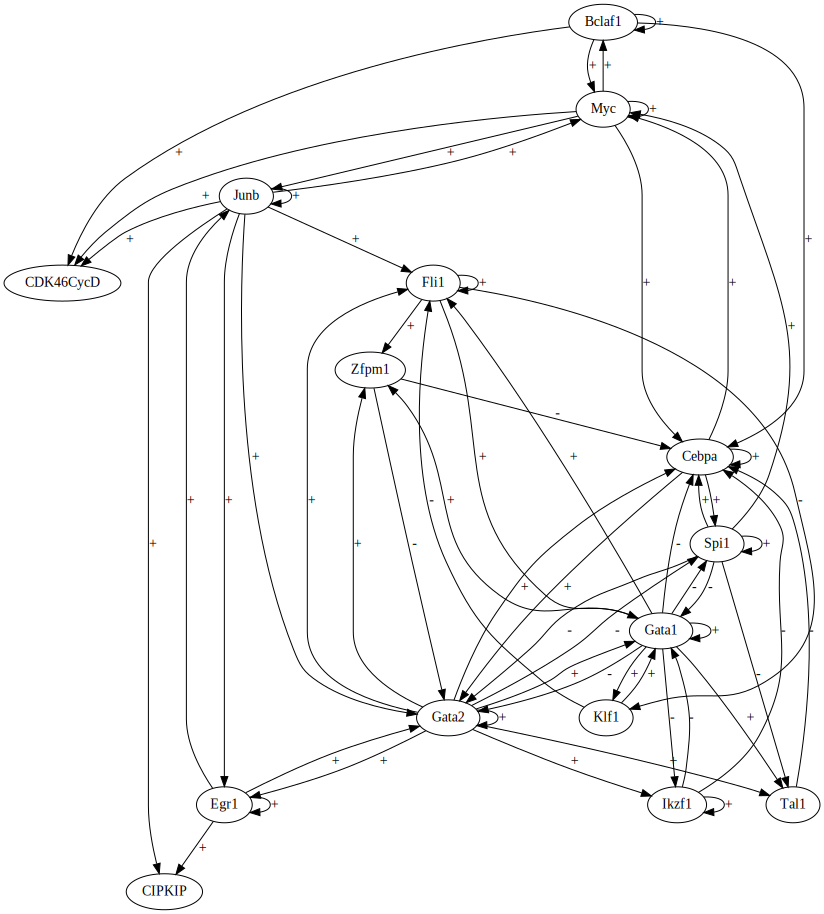

In [41]:
inf = inf0.copy()
#sinf.remove(('Egr1', 'Gata2', {'sign': 1})) # no peaks
#inf.remove(('Gata1', 'Gata1', {'sign': -1})) # no trust in auto neg from scenic plus already an autoact
#inf.remove(('Myc', 'Myc', {'sign': -1})) #  no trust in auto neg from scenic 
#inf.remove(('Gata2', 'Gata2', {'sign': -1})) #  no trust in auto neg from scenic plus already an autoact
#inf.remove(('Egr1', 'Egr1', {'sign': -1})) #  no trust in auto neg from scenic 
#inf.remove(('Junb', 'Junb', {'sign': -1})) #  no trust in auto neg from scenic 
#inf.remove(('Fli1', 'Fli1', {'sign': -1})) #  no trust in auto neg from scenic
#inf.remove(('Gata1', 'Cebpa', {'sign': -1})) # no clear proof only downreg
#inf.remove(('Tal1', 'Cebpa', {'sign': -1})) # no clear proof only downreg

#inf.remove(('Junb', 'Gata2', {'sign': 1})) #  no trust in auto neg from scenic 

dom0 = bonesis.InfluenceGraph(inf, maxclause = 3,exact=False)
allEdges = funForBonesis.multiDiGraphToEdgeList(dom0)
dom0

In [42]:
influenceGraphTable = influenceGraphTable[numpy.logical_not((influenceGraphTable["mor"] == -1) & (influenceGraphTable["tf"] == influenceGraphTable["target"]))]


In [24]:
len(influenceGraphTable)

60

In [43]:
def mutant_constraint(mutation, phenotypes,bo):
    with bo.mutant(mutation) as m:
        # each phenotype can be reached from at least one init
        for ph in phenotypes:
            +m.obs("iHSC") >= m.fixed(+m.obs(ph))
        # each possible initial configuration can only reach fixed points matching with phenotypes
        for cfg in bonesis.matching_configurations(m.obs("iHSC")):
            cfg >> "fixpoints" ^ {m.obs(ph) for ph in phenotypes}

def buildConstraints(inf,data, maxclause = 3,exact =True,parallel=24):
    dom1 = bonesis.InfluenceGraph(inf, maxclause = maxclause,exact=exact)
    bo = bonesis.BoNesis(dom1, data)
    bo.settings["parallel"] = 28
    fLymph = bo.fixed(~bo.obs("pLymph"))
    fEr = bo.fixed(~bo.obs("pEr"));
    fMk = bo.fixed(~bo.obs("pMk"));
    fNeuMast = bo.fixed(~bo.obs("pNeuMast"));
    start = ~bo.obs("iHSC")

    start >= ~bo.obs("srHSC")
    start >= ~bo.obs("qHSC")
    start >= fLymph
    start >= ~bo.obs("preDiff") >= fEr
    start >= ~bo.obs("preDiff") >= fMk
    start >= ~bo.obs("preDiff") >= fNeuMast

    ~bo.obs("srHSC") >= start
    ~bo.obs("qHSC") >= start
    ~bo.obs("preDiff") / ~bo.obs("qHSC")
    ~bo.obs("preDiff") / ~bo.obs("srHSC")
    ~bo.obs("preDiff") / start
    ~bo.obs('zeros') / fNeuMast
    ~bo.obs('zeros') / fMk
    ~bo.obs('zeros') / fEr

    ~bo.obs('zeros') / fLymph
    ~bo.obs("iHSC") >> "fixpoints" ^ {bo.obs(obs) for obs in ["pLymph", "pNeuMast","pEr","pMk","zeros"]};

    mutant_constraint({"Spi1":0}, ["pEr","pMk","zeros"],bo)
    #mutant_constraint({"Cebpa":0}, ["pEr","pMk"],bo)
    mutant_constraint({"Ikzf1":0}, ["pEr","pMk","pNeuMast","zeros"],bo)
    mutant_constraint({"Klf1":0}, ["pMk","pLymph","pNeuMast","zeros"],bo)
    


    mutant_constraint({"Junb":1}, ["G0pMk"],bo)
    mutant_constraint({"Egr1":1}, ["G0pMk"],bo)

    mutant_constraint({"Junb":0}, ["G2MpNeuMast","pEr","pMk","pNeuMast","pLymph","zeros"],bo)
    return bo


In [44]:

    
bo0 = buildConstraints(inf = dom0,data = data,exact = False,maxclause = 3)


    # In[4]:


view = bo0.boolean_networks()   
filename = "optimization"
view.standalone(output_filename=filename+".asp")
a_file = open(filename+".asp", "r")
list_of_lines = a_file.readlines()


    # In[5]:

Trusted = []
Trusted = ['trustedin("'+ i[0]+'","'+i[1]+'",'+str([*i[2].values()][0])+').\n' for i in infTrusted]
Trusted += ['nTrustedEdges(N,X) :- clause(N,_,_,_),X = #count{L,S: clause(N,_,L,S),trustedin(L,N,S)}.\n',
            'trustedInKept(T) :- T=#sum{V,O: nTrustedEdges(O,V)}.\n',
            '#maximize{N@2:trustedInKept(N)}.\n']

insert_at = len(list_of_lines)-4   # Index starting from which multiple elements will be inserted

insert_elements = Trusted +['% Add an edges number minimization\n',
                    'nedges(N,X) :- clause(N,_,_,_),X = #count{L,S: clause(N,_,L,S),not trustedin(L,N,S)}.\n',
                    'totedges(T) :- T=#sum{V,O: nedges(O,V)}.\n',
                    '#minimize{N@1:totedges(N)}.\n']


list_of_lines[insert_at:insert_at] = insert_elements


    # In[6]:


a_file = open(filename+".asp", "w")
a_file.writelines(list_of_lines)
a_file.close()


In [ ]:
solving = funForBonesis.shell(['sh',filename+".asp"])

In [ ]:
optima = [s for s in solving[0].split('\\n') if "Optimization" in s][-1].split(':')[1]


maximumEdgesNonTrusted = int(optima.split(" ")[2])
minimumEdgesTrusted = -int(optima.split(" ")[1])

print(maximumEdgesNonTrusted)
print(minimumEdgesTrusted)


In [ ]:
view = bo0.boolean_networks()   
view.standalone(output_filename=filename+".asp")

In [ ]:

view = bo0.boolean_networks()   
filename = "miniEdgeSol"
view.standalone(output_filename=filename+".asp")
a_file = open(filename+".asp", "r")
list_of_lines = a_file.readlines()


    # In[10]:


insert_at = len(list_of_lines)-4   # Index starting from which multiple elements will be inserted

insert_elements = Trusted[0:-3] + ['% Add a non trusted edges number limitation\n',
                    'nedges(N,X) :- clause(N,_,_,_),X = #count{L,S: clause(N,_,L,S),not trustedin(L,N,S)}.\n',
                    'totedges(T) :- T=#sum{V,O: nedges(O,V)}.\n',
                    ':- totedges(T) ; T>'+str(maximumEdgesNonTrusted)+'.\n'] +['% Add a trusted edges number limitation\n',
                    'nTrustedEdges(N,X) :- clause(N,_,_,_),X = #count{L,S: clause(N,_,L,S), trustedin(L,N,S)}.\n',
                    'trustedInKept(T) :- T=#sum{V,O: nTrustedEdges(O,V)}.\n',
                    ':- trustedInKept(T) ; T<'+str(minimumEdgesTrusted)+'.\n']


list_of_lines[insert_at:insert_at] = insert_elements


    # In[11]:


a_file = open(filename+".asp", "w")
a_file.writelines(list_of_lines)
a_file.close()

In [64]:
solving = funForBonesis.shell(['sh',filename+".asp"])

In [65]:

solving = [s for s in solving[0].split('\\n')]
#answerList = [l.strip("\n") for l in answerList]


# In[13]:


answerList = [l for l in solving if l.startswith("clause")]

len(answerList)


    # In[14]:


solutions = [funForBonesis.minibn_of_facts2(funForBonesis.getAnswerDict(sol)) for sol in answerList]


    # In[15]:


#pickle.dump(solutions, open(outDir+"/solutions.p", "wb" ),fix_imports=True,protocol=1 )

In [66]:
len(solutions)

2088

In [ ]:
pickle.dump(solutions, open("optimized_solutions_test.p", "wb" ),fix_imports=True,protocol=1 )


In [24]:
#with open("optimized_solutions_test.p", "rb") as input_file:
#    solutions = pickle.load(input_file)

In [25]:
len(solutions)

616

# computing graph layout...


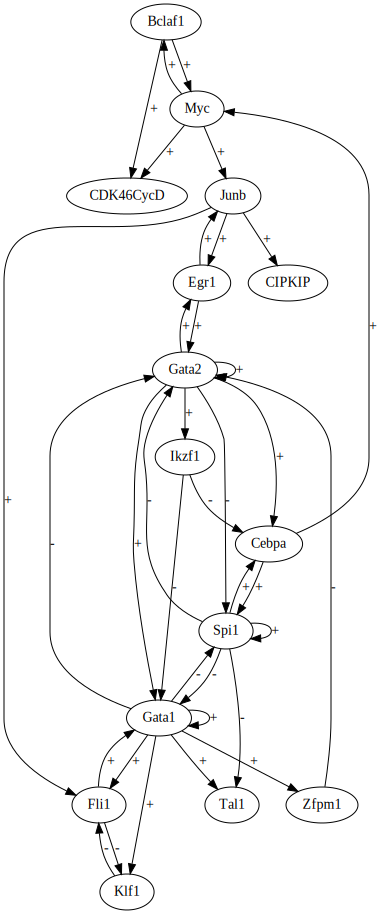

In [26]:
edgeList = []
nEdges = []
for s in solutions:
    nEdges.append(len([e for e in s.influence_graph().edges(data=True) if e not in edgeList]))
    for e in s.influence_graph().edges(data=True):
        edgeList.append(e) if e not in edgeList else edgeList
len(edgeList)

domPossible = bonesis.InfluenceGraph(edgeList, maxclause = 3,exact=False)
domPossible

In [27]:
len(domPossible.edges(data=True))
allEdges = funForBonesis.multiDiGraphToEdgeList(domPossible)
len(allEdges)

36

# computing graph layout...


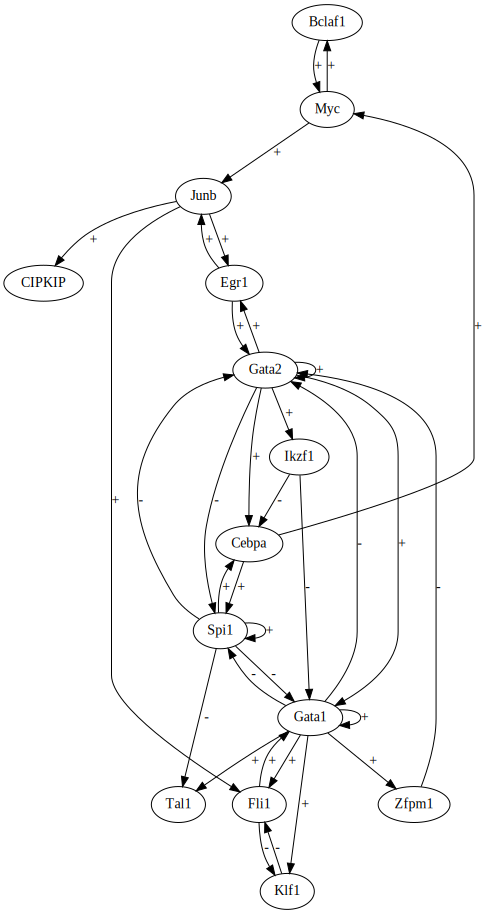

In [28]:
essentialEdges = list(solutions[-1].influence_graph().edges(data=True))
for e in essentialEdges:
    for s in range(len(solutions)-1):
        if e not in solutions[s].influence_graph().edges(data=True):
            essentialEdges.remove(e)
            break
        
  

domEssential = bonesis.InfluenceGraph(essentialEdges, maxclause = 2,exact=False)
domEssential

In [29]:
for i in range(len(essentialEdges)):
    essentialEdges[i][2].pop('label', None)

len(essentialEdges)


34

In [30]:
influenceGraphTable["essential"] = [True if inf[e] in essentialEdges else False for e in range(len(inf))]

In [31]:
influenceGraphTable["solution"] = [True if inf[e] in allEdges else False for e in range(len(inf))]
influenceGraphTable[(influenceGraphTable["essential"] == False) & (influenceGraphTable["solution"] == True)]

,tf,mor,target,ref,proof_level,cell_type,Trusted,Scenic,cistromeAdjScore,interaction0,essential,solution
0,Bclaf1,1,CDK46CycD,NaN,NaN,NaN,0,True,NaN,Bclaf1_CDK46CycD,False,True
32,Myc,1,CDK46CycD,NaN,NaN,NaN,0,True,0.0894,Myc_CDK46CycD,False,True


In [32]:
influenceGraphTable[(influenceGraphTable["essential"] == True)]

,tf,mor,target,ref,proof_level,cell_type,Trusted,Scenic,cistromeAdjScore,interaction0,essential,solution
2,Bclaf1,1,Myc,NaN,NaN,NaN,0,True,NaN,Bclaf1_Myc,True,True
5,Cebpa,1,Myc,NaN,NaN,NaN,0,True,2.982833,Cebpa_Myc,True,True
6,Egr1,1,Junb,NaN,NaN,NaN,0,True,0.007750,Egr1_Junb,True,True
8,Egr1,1,Gata2,NaN,NaN,NaN,0,True,0.000000,Egr1_Gata2,True,True
12,Gata1,1,Klf1,Krumsiek_2011,NaN,NaN,1,True,3.243200,Gata1_Klf1,True,True
13,Gata1,1,Gata1,Krumsiek_2011,NaN,NaN,1,True,2.538600,Gata1_Gata1,True,True
14,Gata2,1,Ikzf1,Malinge_2013,transcriptionnal_regulation,NaN,1,True,0.370300,Gata2_Ikzf1,True,True
17,Gata2,1,Cebpa,NaN,NaN,NaN,0,True,0.010200,Gata2_Cebpa,True,True
18,Gata2,1,Egr1,NaN,NaN,NaN,0,True,0.108300,Gata2_Egr1,True,True
20,Gata2,1,Gata2,Krumsiek_2011,NaN,NaN,1,True,0.275000,Gata2_Gata2,True,True


In [33]:
finalEdges = allEdges.copy()
#finalEdges.remove(('Junb', 'CDK46CycD', {'sign': 1})) 
#finalEdges.remove(('Bclaf1', 'Cebpa', {'sign': 1}))
#finalEdges.remove(('Gata1', 'Cebpa', {'sign': -1})) # no clear proof only downreg
#finalEdges.remove(('Tal1', 'Cebpa', {'sign': -1})) # no clear proof only downreg
#finalEdges.remove(('Zfpm1', 'Cebpa', {'sign': -1})) # weak peaks
#finalEdges.remove(('Gata2', 'Gata2', {'sign': 1})) # 
#finalEdges.remove(('Ikzf1', 'Ikzf1', {'sign': 1})) # Junb is activated in quiescent cell no peaks
#finalEdges.remove(('Cebpa', 'Gata2', {'sign': 1})) # No ref

finalEdges = finalEdges.copy()
#finalEdges.append(('Bclaf1', 'CDK46CycD', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Myc', 'CDK46CycD', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Gata2', 'Egr1', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Junb', 'Gata2', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Junb', 'Egr1', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Gata1', 'Gata2', {'sign': -1})) # Junb is activated in quiescent cell
#finalEdges.append(('Zfpm1', 'Gata2', {'sign': -1})) # Junb is activated in quiescent cell
#finalEdges.append(('Gata2', 'Gata2', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Gata1', 'Zfpm1', {'sign': 1})) # Junb is activated in quiescent cell


# computing graph layout...


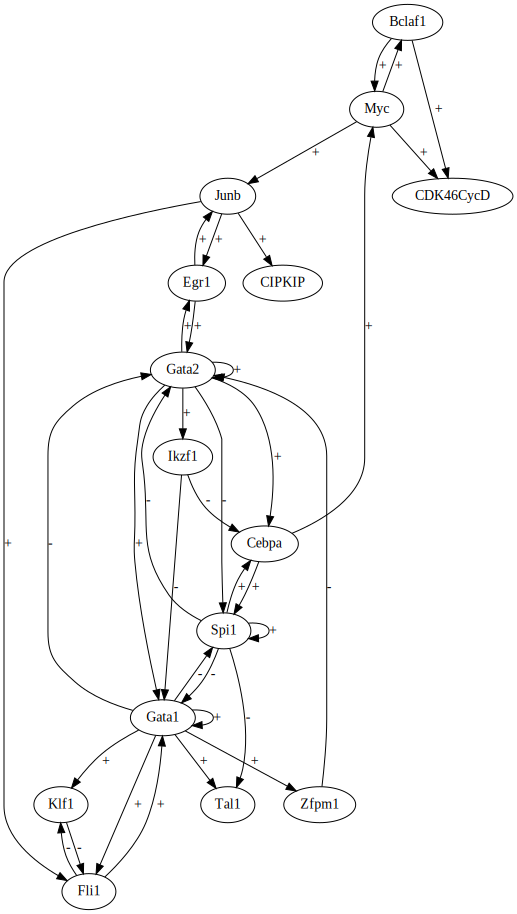

In [35]:
domMini = bonesis.InfluenceGraph(finalEdges, maxclause = 3,exact=True)
domMini

In [40]:
solutions = []
bo1 = buildConstraints(domMini,data = data,exact = True,maxclause = 3)
view = bo1.boolean_networks()
view.standalone(output_filename="secondInfExact.asp")


In [41]:
solutions = []
for bn in bo1.boolean_networks(): # limit is optional
    if(funForBonesis.has_cyclic(bn)):
        print("HAS CYCLIC ATTRACTORS, IGNORING")
        continue
    solutions.append(bn)

print(len(solutions))

Grounding...done in 0.3s
616


In [42]:
pickle.dump(solutions, open("possible_final_solutions.p", "wb" ),fix_imports=True,protocol=1 )


In [43]:
table = pd.DataFrame(solutions)
table.sort_values(by=geneOrder, inplace=True)
table[geneOrder]

,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CIPKIP,CDK46CycD
445,Junb&Gata2,Egr1|Myc,!Spi1&Gata1,Myc,Cebpa&Bclaf1,Junb|(Gata1&!Klf1),(Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Egr1&Gata2...,Gata2,(Spi1&!Gata1)|(!Gata1&Cebpa&!Gata2),(!Ikzf1&Gata2)|(Spi1&!Ikzf1),Fli1|(!Ikzf1&Gata1)|(!Spi1&Gata2),Gata1&!Fli1,Gata1,Junb,Myc&Bclaf1
374,Junb&Gata2,Egr1|Myc,!Spi1&Gata1,Myc,Cebpa&Bclaf1,Junb|(Gata1&!Klf1),(Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Egr1&Gata2...,Gata2,(Spi1&!Gata1)|(!Gata1&Cebpa&!Gata2),(!Ikzf1&Gata2)|(Spi1&!Ikzf1),Fli1|(!Ikzf1&Gata1)|(!Spi1&Gata2),Gata1&!Fli1,Gata1,Junb,Bclaf1|Myc
458,Junb&Gata2,Egr1|Myc,!Spi1&Gata1,Myc,Cebpa&Bclaf1,Junb|(Gata1&!Klf1),(Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Egr1&Gata2...,Gata2,(Spi1&!Gata1)|(!Gata1&Cebpa&!Gata2),(!Ikzf1&Gata2)|(Spi1&!Ikzf1),Fli1|(!Spi1&Gata2)|(!Spi1&!Ikzf1&Gata1),Gata1&!Fli1,Gata1,Junb,Myc&Bclaf1
460,Junb&Gata2,Egr1|Myc,!Spi1&Gata1,Myc,Cebpa&Bclaf1,Junb|(Gata1&!Klf1),(Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Egr1&Gata2...,Gata2,(Spi1&!Gata1)|(!Gata1&Cebpa&!Gata2),(!Ikzf1&Gata2)|(Spi1&!Ikzf1),Fli1|(!Spi1&Gata2)|(!Spi1&!Ikzf1&Gata1),Gata1&!Fli1,Gata1,Junb,Bclaf1|Myc
94,Junb&Gata2,Egr1|Myc,!Spi1&Gata1,Myc,Cebpa&Bclaf1,Junb|(Gata1&!Klf1),(Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Egr1&!Zfpm1),Gata2,(Spi1&!Gata1)|(!Gata1&Cebpa&!Gata2),(!Ikzf1&Gata2)|(Spi1&!Ikzf1),Fli1|(!Ikzf1&Gata1)|(!Spi1&Gata2),Gata1&!Fli1,Gata1,Junb,Myc&Bclaf1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,Junb&Gata2,Egr1|Myc,!Spi1&Gata1,Myc,Cebpa&Bclaf1,(Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb),(!Spi1&Egr1&!Zfpm1)|(!Spi1&!Gata1&Gata2)|(!Gat...,Gata2,(Spi1&!Gata1)|(!Gata1&Cebpa&!Gata2),(!Ikzf1&Gata2)|(Spi1&!Ikzf1),Fli1|(!Spi1&Gata2)|(!Spi1&!Ikzf1&Gata1),Gata1&!Fli1,Gata1,Junb,Bclaf1|Myc
580,Junb&Gata2,Egr1|Myc,!Spi1&Gata1,Myc,Cebpa&Bclaf1,(Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb),(!Spi1&!Gata1&Gata2)|(!Gata1&Gata2&!Zfpm1)|(!S...,Gata2,(Spi1&!Gata1)|(!Gata1&Cebpa&!Gata2),(!Ikzf1&Gata2)|(Spi1&!Ikzf1),Fli1|(!Ikzf1&Gata1)|(!Spi1&Gata2),Gata1&!Fli1,Gata1,Junb,Myc&Bclaf1
592,Junb&Gata2,Egr1|Myc,!Spi1&Gata1,Myc,Cebpa&Bclaf1,(Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb),(!Spi1&!Gata1&Gata2)|(!Gata1&Gata2&!Zfpm1)|(!S...,Gata2,(Spi1&!Gata1)|(!Gata1&Cebpa&!Gata2),(!Ikzf1&Gata2)|(Spi1&!Ikzf1),Fli1|(!Ikzf1&Gata1)|(!Spi1&Gata2),Gata1&!Fli1,Gata1,Junb,Bclaf1|Myc
587,Junb&Gata2,Egr1|Myc,!Spi1&Gata1,Myc,Cebpa&Bclaf1,(Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb),(!Spi1&!Gata1&Gata2)|(!Gata1&Gata2&!Zfpm1)|(!S...,Gata2,(Spi1&!Gata1)|(!Gata1&Cebpa&!Gata2),(!Ikzf1&Gata2)|(Spi1&!Ikzf1),Fli1|(!Spi1&Gata2)|(!Spi1&!Ikzf1&Gata1),Gata1&!Fli1,Gata1,Junb,Myc&Bclaf1


In [44]:
table.nunique()

Bclaf1        1
CDK46CycD     2
CIPKIP        1
Cebpa         1
Egr1          1
Fli1          2
Gata1         2
Gata2        77
Ikzf1         1
Junb          1
Klf1          1
Myc           1
Spi1          1
Tal1          1
Zfpm1         1
dtype: int64

In [45]:
print(pd.DataFrame(table["CDK46CycD"].unique())) # 1 obvious
print(pd.DataFrame(table["Cebpa"].unique())) # 0 simpler one activator none inhibitor
print(pd.DataFrame(table["Fli1"].unique())) # 2 closer to Krum (!Klf1&Junb)|(!Klf1&Gata1&Fli1)
print(pd.DataFrame(table["Gata2"].unique())) # 1  (Junb&Gata2)|(!Zfpm1&Egr1&!Spi1&!Gata1)
print(pd.DataFrame(table["Gata1"].unique())) # 0 ref Krumsiek (!Gata1&!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1)
print(pd.DataFrame(table["Tal1"].unique())) # 0 ref Krumsiek

            0
0  Myc&Bclaf1
1  Bclaf1|Myc
                              0
0  (!Ikzf1&Gata2)|(Spi1&!Ikzf1)
                                         0
0                       Junb|(Gata1&!Klf1)
1  (Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb)
                                                    0
0   (Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Egr1&Gata2...
1    (Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Egr1&!Zfpm1)
2   (Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Gata2&!Zfpm1)
3   (Egr1&!Gata1)|(!Gata1&Gata2&!Zfpm1)|(!Spi1&Egr...
4   (Egr1&!Gata1)|(!Gata1&Gata2&!Zfpm1)|(!Spi1&Gat...
..                                                ...
72          (!Spi1&Egr1&!Zfpm1)|(!Gata1&Gata2&!Zfpm1)
73  (!Spi1&Egr1&!Zfpm1)|(!Gata1&Gata2&!Zfpm1)|(!Sp...
74  (!Spi1&Egr1&!Zfpm1)|(!Gata1&Gata2&!Zfpm1)|(!Sp...
75  (!Spi1&Egr1&!Zfpm1)|(!Spi1&!Gata1&Gata2)|(!Gat...
76  (!Spi1&!Gata1&Gata2)|(!Gata1&Gata2&!Zfpm1)|(!S...

[77 rows x 1 columns]
                                         0
0        Fli1|(!Ikzf1&Gata1)|(!Spi1&Gata2)
1  Fli1|

In [46]:
table.nunique()

Bclaf1        1
CDK46CycD     2
CIPKIP        1
Cebpa         1
Egr1          1
Fli1          2
Gata1         2
Gata2        77
Ikzf1         1
Junb          1
Klf1          1
Myc           1
Spi1          1
Tal1          1
Zfpm1         1
dtype: int64

In [47]:
for n in table.nunique().index:
    if table.nunique()[n] > 1:
        print(n)
        print(pd.DataFrame(table[n].unique())) 

CDK46CycD
            0
0  Myc&Bclaf1
1  Bclaf1|Myc
Fli1
                                         0
0                       Junb|(Gata1&!Klf1)
1  (Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb)
Gata1
                                         0
0        Fli1|(!Ikzf1&Gata1)|(!Spi1&Gata2)
1  Fli1|(!Spi1&Gata2)|(!Spi1&!Ikzf1&Gata1)
Gata2
                                                    0
0   (Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Egr1&Gata2...
1    (Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Egr1&!Zfpm1)
2   (Egr1&!Gata1)|(!Gata1&Gata2)|(!Spi1&Gata2&!Zfpm1)
3   (Egr1&!Gata1)|(!Gata1&Gata2&!Zfpm1)|(!Spi1&Egr...
4   (Egr1&!Gata1)|(!Gata1&Gata2&!Zfpm1)|(!Spi1&Gat...
..                                                ...
72          (!Spi1&Egr1&!Zfpm1)|(!Gata1&Gata2&!Zfpm1)
73  (!Spi1&Egr1&!Zfpm1)|(!Gata1&Gata2&!Zfpm1)|(!Sp...
74  (!Spi1&Egr1&!Zfpm1)|(!Gata1&Gata2&!Zfpm1)|(!Sp...
75  (!Spi1&Egr1&!Zfpm1)|(!Spi1&!Gata1&Gata2)|(!Gat...
76  (!Spi1&!Gata1&Gata2)|(!Gata1&Gata2&!Zfpm1)|(!S...

[77 rows x 1 columns]
